In [ ]:
import helper_functions as H
import xml.etree.ElementTree as ET
import pprint as pp
import tkinter

In [ ]:
xmlfile = "Interfaces.xml"

In [ ]:
# create element tree object 
tree = ET.parse(xmlfile) 

# get root element 
root = tree.getroot() 

# create empty list for news items 
signals = {}

# iterate news items 
for item in root.findall('./InputSignals/Signal'): 
    
#     print(item.attrib['Name'])
    signals[item.attrib['Name']] = [item.attrib['BaseType'], '']
    
pp.pprint(signals)

In [ ]:
signals = {'olp crane function 1b': 'itf_In_AOR_str_aorIn_OLP_craneFunction_craneFunction_firstBoom',
 'olp dump1 request': 'itf_In_AOR_str_aorIn_OLP_ctrlDump_val',
 'olp dump1 spool pos 1b lim': 'itf_In_AOR_str_aorIn_OLP_DumpSpoolPos1BLim_val',
 'olp state 1b': 'itf_In_AOR_str_aorIn_OLP_olpState1B_val',
 'rclh crane function 1b': 'itf_In_AOR_str_aorIn_RCLH_craneFunction_craneFunction_firstBoom',
 'rel spool pos 1b': 'itf_In_AOR_str_aorIn_LPLC_actualCap1B_val',
 'remote control mode': 'itf_In_AOR_str_aorIn_RCUI_rcMode_rcMode_rcMode',
 'sensor variant 1b angle': 'itf_In_AOR_str_aorIn_ANG_variant_angVariants_variant1B',
 'stationary mode': 'itf_In_AOR_str_aorIn_SMOD_stationaryMode_val'}


In [ ]:
# def parse_testSpec(filename):

filename = 'SLS component Test Specification.md'

with open(filename, 'r') as reader:
    print(f'file {filename} opened')
    testFound = -1
    data = reader.readlines()
    TC_list = []
    for line in data:
        print(line)
        isFound = H.isHeaderType(0, line)
        if isFound:
            testFound = testFound + 1
            TC_list.append([line])
        else:
            if testFound > -1:
                TC_list[testFound].append(line)

In [ ]:
TC_list[35]

In [ ]:
missingSignals = []
signals = []

In [ ]:
for TC in TC_list:
    
    # Initialize flags
    test_precondFound = False
    test_descrFound = False
    test_bodyObj_pre = None
    test_bodyObj_descr = None

    
    # Extract the name of the testcase from the first line
    test_name = TC[0][8:-3]
    
    test_obj = H.init_Test(test_name)
    
    # Loop through all the lines in the testcase
    for line in TC:

        print(line)
        
        if line == '\n':
            continue

        # Check if Preconditions part is found 
        if H.isHeaderType(1, line):
            
            # Set flags
            test_precondFound = True
            
            continue
            
        # Check if Test Description part is found 
        if H.isHeaderType(2, line):
            
            # Set flags
            test_descrFound = True
            test_precondFound = False
                    
            continue

        if test_descrFound:
            
            # add a step of type 1 (test step) in the C body
            H.addTPTStep(1, test_obj, line, signals, missingSignals)
            
            continue            
            
        if test_precondFound:
            
            # add a step of type 0 (precondition) in the C body
            H.addTPTStep(0, test_obj, line, signals, missingSignals)
            
            continue
                        
    H.write_TCtoFile(test_name, test_obj)
    
#     break


In [ ]:
pp.pprint(test_obj)

In [ ]:
import pprint as pp
pp.pprint(missingSignals)
pp.pprint(signals)

In [ ]:
signals={'itf_In_AOR_str_aorIn_ANG_variant_angVariants_variant1B': 'sensor variant 1b angle',
 'itf_In_AOR_str_aorIn_ANG_variant_angVariants_variant2B': '',
 'itf_In_AOR_str_aorIn_ANG_variant_angVariants_variant3B': '',
 'itf_In_AOR_str_aorIn_ANG_variant_angVariants_variant4B': '',
 'itf_In_AOR_str_aorIn_ANG_variant_angVariants_variantCol': '',
 'itf_In_AOR_str_aorIn_ANG_variant_status': '',
 'itf_In_AOR_str_aorIn_APPEH_errorStates_errorStates_angleErrorState': '',
 'itf_In_AOR_str_aorIn_APPEH_errorStates_errorStates_errorAckState': '',
 'itf_In_AOR_str_aorIn_APPEH_errorStates_errorStates_lenErrorState': '',
 'itf_In_AOR_str_aorIn_APPEH_errorStates_errorStates_pressBoomErrorState': '',
 'itf_In_AOR_str_aorIn_APPEH_errorStates_errorStates_pressStabErrorState': '',
 'itf_In_AOR_str_aorIn_APPEH_errorStates_status': '',
 'itf_In_AOR_str_aorIn_LPLC_actualCap1B_status': '',
 'itf_In_AOR_str_aorIn_LPLC_actualCap1B_val': 'rel spool pos 1b',
 'itf_In_AOR_str_aorIn_OLP_DumpSpoolPos1BLim_status': '',
 'itf_In_AOR_str_aorIn_OLP_DumpSpoolPos1BLim_val': 'olp dump1 spool pos 1b lim',
 'itf_In_AOR_str_aorIn_OLP_craneFunction_craneFunction_column': '',
 'itf_In_AOR_str_aorIn_OLP_craneFunction_craneFunction_firstBoom': 'olp crane function 1b',
 'itf_In_AOR_str_aorIn_OLP_craneFunction_craneFunction_firstBoomExt': '',
 'itf_In_AOR_str_aorIn_OLP_craneFunction_craneFunction_fourthBoom': '',
 'itf_In_AOR_str_aorIn_OLP_craneFunction_craneFunction_fourthBoomExt': '',
 'itf_In_AOR_str_aorIn_OLP_craneFunction_craneFunction_hoist': '',
 'itf_In_AOR_str_aorIn_OLP_craneFunction_craneFunction_secondBoom': '',
 'itf_In_AOR_str_aorIn_OLP_craneFunction_craneFunction_secondBoomExt': '',
 'itf_In_AOR_str_aorIn_OLP_craneFunction_craneFunction_slew': '',
 'itf_In_AOR_str_aorIn_OLP_craneFunction_craneFunction_thirdBoom': '',
 'itf_In_AOR_str_aorIn_OLP_craneFunction_craneFunction_thirdBoomExt': '',
 'itf_In_AOR_str_aorIn_OLP_craneFunction_craneFunction_tool1': '',
 'itf_In_AOR_str_aorIn_OLP_craneFunction_craneFunction_tool2': '',
 'itf_In_AOR_str_aorIn_OLP_craneFunction_craneFunction_tool3': '',
 'itf_In_AOR_str_aorIn_OLP_craneFunction_craneFunction_tool4': '',
 'itf_In_AOR_str_aorIn_OLP_craneFunction_status': '',
 'itf_In_AOR_str_aorIn_OLP_ctrlDump_status': '',
 'itf_In_AOR_str_aorIn_OLP_ctrlDump_val': 'olp dump1 request',
 'itf_In_AOR_str_aorIn_OLP_olpState1B_status': '',
 'itf_In_AOR_str_aorIn_OLP_olpState1B_val': 'olp state 1b',
 'itf_In_AOR_str_aorIn_RCLH_craneFunction_craneFunction_column': '',
 'itf_In_AOR_str_aorIn_RCLH_craneFunction_craneFunction_firstBoom': 'rclh crane function 1b',
 'itf_In_AOR_str_aorIn_RCLH_craneFunction_craneFunction_firstBoomExt': '',
 'itf_In_AOR_str_aorIn_RCLH_craneFunction_craneFunction_fourthBoom': '',
 'itf_In_AOR_str_aorIn_RCLH_craneFunction_craneFunction_fourthBoomExt': '',
 'itf_In_AOR_str_aorIn_RCLH_craneFunction_craneFunction_hoist': '',
 'itf_In_AOR_str_aorIn_RCLH_craneFunction_craneFunction_secondBoom': '',
 'itf_In_AOR_str_aorIn_RCLH_craneFunction_craneFunction_secondBoomExt': '',
 'itf_In_AOR_str_aorIn_RCLH_craneFunction_craneFunction_slew': '',
 'itf_In_AOR_str_aorIn_RCLH_craneFunction_craneFunction_thirdBoom': '',
 'itf_In_AOR_str_aorIn_RCLH_craneFunction_craneFunction_thirdBoomExt': '',
 'itf_In_AOR_str_aorIn_RCLH_craneFunction_craneFunction_tool1': '',
 'itf_In_AOR_str_aorIn_RCLH_craneFunction_craneFunction_tool2': '',
 'itf_In_AOR_str_aorIn_RCLH_craneFunction_craneFunction_tool3': '',
 'itf_In_AOR_str_aorIn_RCLH_craneFunction_craneFunction_tool4': '',
 'itf_In_AOR_str_aorIn_RCLH_craneFunction_status': '',
 'itf_In_AOR_str_aorIn_RCUI_rcMode_rcMode_menu': '',
 'itf_In_AOR_str_aorIn_RCUI_rcMode_rcMode_rcMode': 'remote control mode',
 'itf_In_AOR_str_aorIn_RCUI_rcMode_status': '',
 'itf_In_AOR_str_aorIn_RSP_spoolPos1B_status': '',
 'itf_In_AOR_str_aorIn_RSP_spoolPos1B_val': '',
 'itf_In_AOR_str_aorIn_SMOD_stationaryMode_status': '',
 'itf_In_AOR_str_aorIn_SMOD_stationaryMode_val': 'stationary mode'}

In [ ]:
new_signals = dict([(value,key) for (key,value) in signals.items()])

In [ ]:
pp.pprint(new_signals)

In [ ]:
stra = "| 4. | Check signal value of `SSV Dump1 Control Request` | Signal value of `SSV Dump1 Control Request`= 0 "
spliff=stra.split("|")
newstr = ''.join((ch if ch in '0123456789.-' else ' ') for ch in spliff[3])
newstr.split()

In [ ]:
listOfNumbers = []

for i in newstr.split():

    # The try/except is necessary to filter out cases like | - |
    try:
        listOfNumbers.append(float(i))
    except:
        continue

print(listOfNumbers)

In [ ]:
test_obj = ['Set1', 'Set2', 'Set3', '//Comment1', 'Set4', 'Set5', 'Wait1', 'Compare1', 'Compare2', 'Set6', 'Set7', 'Wait2', 'Compare3', 'Compare4', 'Wait3', 'Compare5', 'Compare6']
expected_test_obj = ['Set1', 'Set2', 'Set3', '//Comment1', 'Set4', 'Set5', 'Compare1', 'Compare2', 'Wait1', 'Set6', 'Set7', 'Compare3', 'Compare4', 'Wait2']

In [ ]:
#     for i, step in enumerate(test_obj):
i = 0 

while i < len(test_obj):
    
#     print(f"i={i}")
    
    if 'Wait' in test_obj[i]:

#         print(f"found {test_obj[i]} at pos {i}")

        slice_test_obj=test_obj[i+1:]

#         print(f"slice_test_obj={slice_test_obj}")

        # Find the last 'Check' from the next chunck of 'Checks'
        j = 1
        
        while j < len(slice_test_obj):
            
#             print(f"i={i}")
#             print(f"j={j}")
#             print(f"{slice_test_obj[j]} at pos {i+j}")
            
            if 'Compare' in slice_test_obj[j]:
                j += 1
                continue
            else:
                break

#         print(f"insert at pos {i+j}, from pos {i}")

        # Insert step at position i+j and remove it from position i
        test_obj.insert(i+j, test_obj.pop(i))
        
#         print(f"new list={test_obj}")

        # continue search from position i+j
        i = i+j+1
    
    else:
        i += 1


## Tool for VSL polygons calculations and visualization

* three methods for calculation of the projection are available (the one used is Method 2)
* to execute, update the variable "projected_point_index", run cell containing calculation method and run main cell
* TODO: cleanup points definition for convex(initial) polygon

<IPython.core.display.Javascript object>


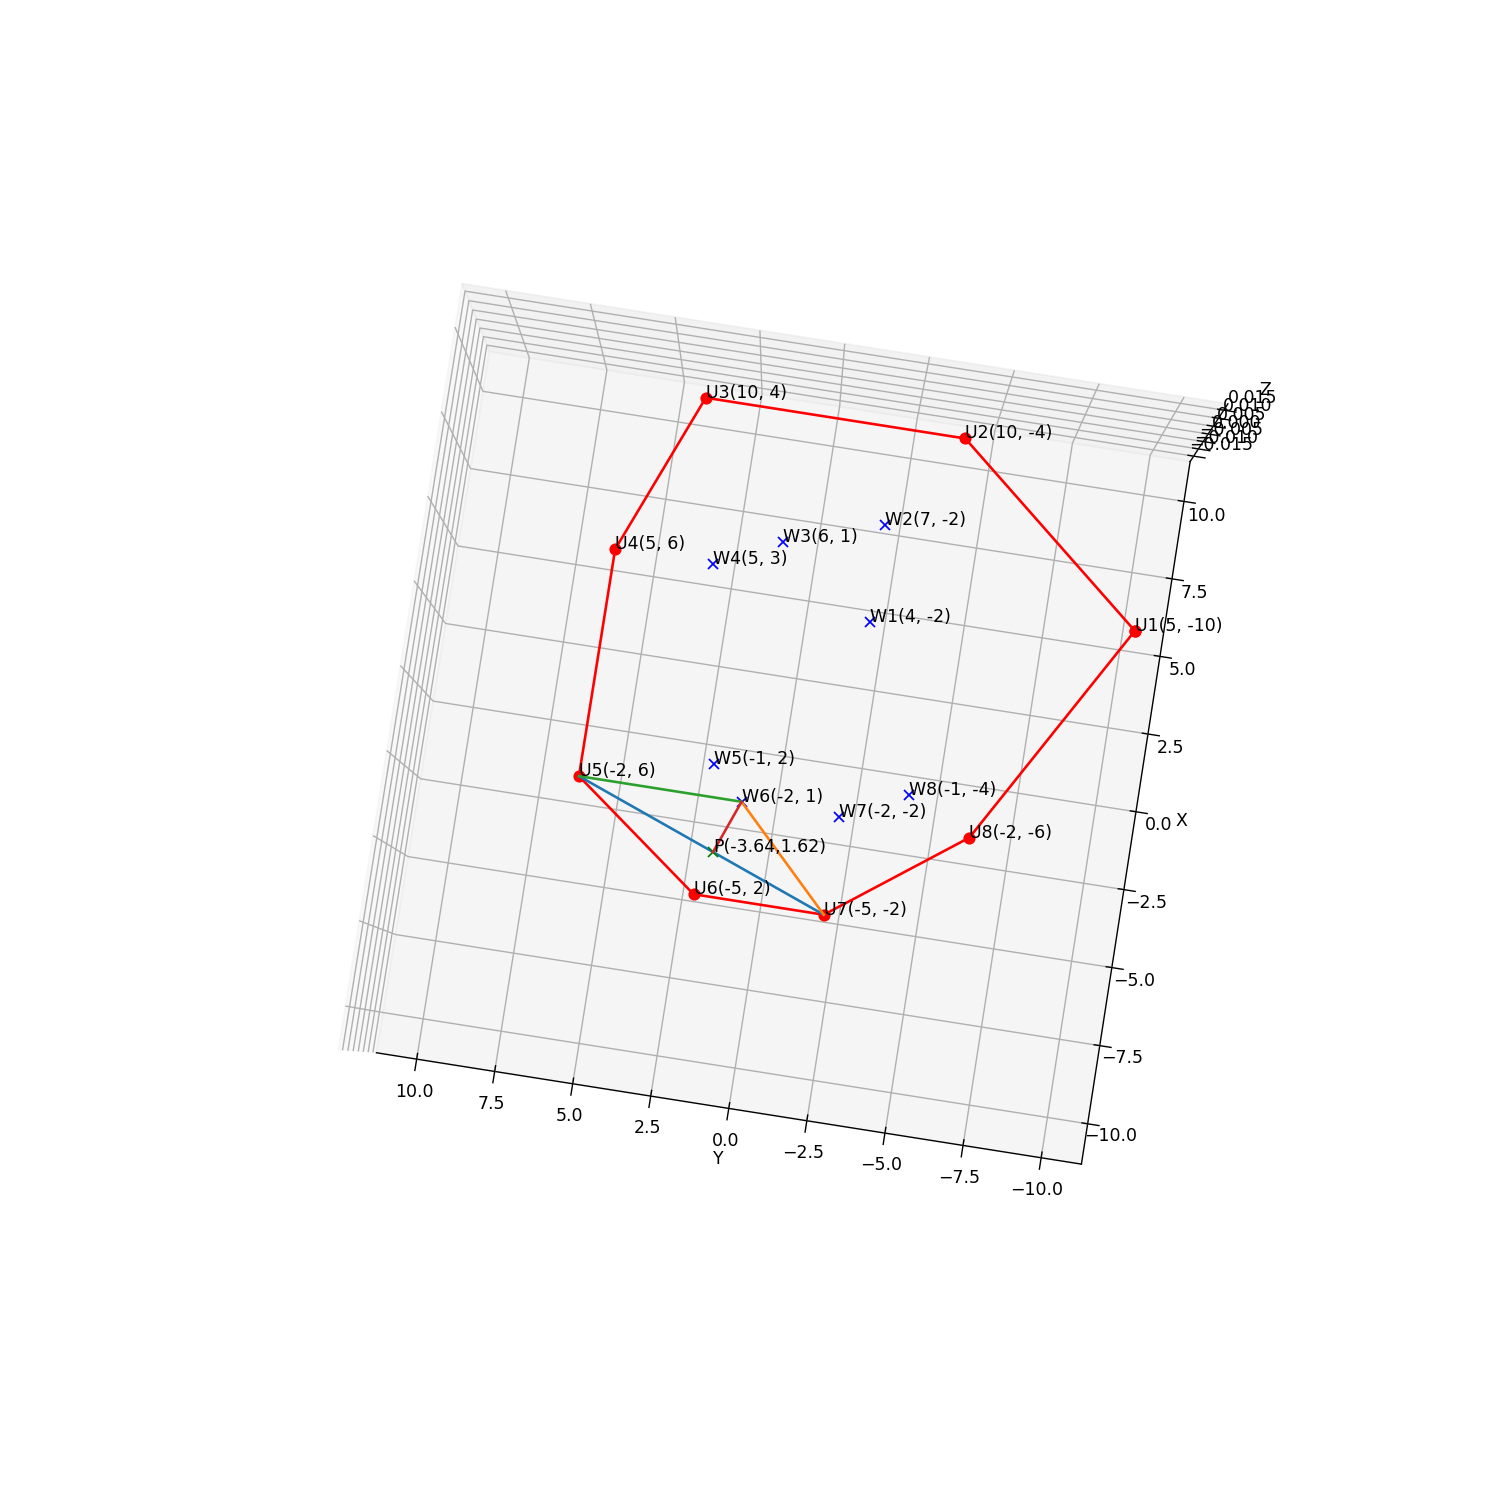

Projected point: (-3.643835616438356, 1.6164383561643838)


In [9]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import mpl_toolkits
import matplotlib

%matplotlib notebook

poly2 = Polygon([
( 5,-10),  # u1
( 10,-4),  # u2
( 10, 4),  # u3
( 5, 6),   # u4
(-2, 6),   # u5
(-5, 2),   # u6
(-5,-2),   # u7
(-2,-6),   # u8
])

x_pol,y_pol = poly2.exterior.xy
z =[0 for elem in x_pol]

x_concave = [
     4,  # w1
     7,  # w2
     6,  # w3
     5,  # w4
    -1,  # w5
    -2,  # w6
    -2,  # w7
    -1   # w8
]

y_concave = [
    -2,  # w1
    -2,  # w2
    1,   # w3
    3,   # w4
    2,   # w5
    1,   # w6
   -2,   # w7
   -4    # w8
]

z_concave = [0] * len(x_concave)



ax = plt.figure(figsize=(12,12)).add_subplot( projection='3d')

# Plot convex points
ax.plot(y_pol, x_pol, z, c='r', marker='o')

# Plot concave points
for (x_c, y_c) in zip(x_concave, y_concave):
    ax.plot(y_c, x_c, 0, c='b', marker='x')

# Add convex points labels
for index,(x, y, zs) in enumerate(zip(y_pol, x_pol, z)):
    if index == 8:
        break
    label = f'U{index+1}({int(y)}, {int(x)})'
    ax.text(x, y, zs, label, None)

#  Add concave points labels
for index,(x, y, zs) in enumerate(zip(y_concave, x_concave, z_concave)):
    label = f'W{index+1}({int(y)}, {int(x)})'
    ax.text(x, y, zs, label, None)


# Consider the three points A, B, C
# We need projection P of point B on the vector AC

# Select the index of the point to project (eg. 1-8, matching points U1-U8)
projected_point_index = 6

# Offset by 1, because of array indexing
x_A = x_pol[projected_point_index-2]
y_A = y_pol[projected_point_index-2]

# Offset by 1, because of array indexing
x_B = x_concave[projected_point_index-1]
y_B = y_concave[projected_point_index-1]

# If the final point was selected, choose the first point
if projected_point_index == 8:
    projected_point_index = 0
    
# Offset by 1, because of array indexing
x_C = x_pol[projected_point_index]
y_C = y_pol[projected_point_index]

#  The vector on which the projection will be made: AC
AC = ([x_A,y_A], [x_C,y_C])
AB = ([x_A,y_A], [x_B,y_B])
BC = ([x_B,y_B], [x_C,y_C])

# The projected point: B
W1 = [x_B, y_B]

# Calculate coordinates of projection: P
x_proj, y_proj = project_point_line_xy(W1, AC)

# BP
x_line_proj = [4, x_proj]
y_line_proj = [-2, y_proj]
z_line_proj = [0] * len(x_line_proj)

# Plot AC
ax.plot([y_A, y_C], [x_A, x_C], [0, 0])
# Plot BC
ax.plot([y_B, y_C], [x_B, x_C], [0, 0])
# Plot AB
ax.plot([y_A, y_B], [x_A, x_B], [0, 0])
# Plot P
ax.plot(y_proj, x_proj, 0, marker='x', c='g')
# Label P
ax.text(y_proj, x_proj, 0, f'P({round(x_proj,2)},{round(y_proj,2)})', None)
# Plot BP
ax.plot([y_proj, y_B], [x_proj, x_B], [0, 0])
    
ax.set_xlim(30.0, -30.0)
ax.set_ylim(-30.0, 30.0)    

ax.set_xlabel('Y ')
ax.set_ylabel('X ')
ax.set_zlabel('Z ')


plt.show()
print(f"Projected point: ({x_proj}, {y_proj})")

In [ ]:
#  Projection calculation
#  Method 1

def getPointProjection(point,line):
    x = np.array(point.coords[0])    
    u = np.array(line.coords[0])
    v = np.array(line.coords[len(line.coords)-1])
    n = v - u
    n /= np.linalg.norm(n, 2)

    P = u + n*np.dot(x - u, n)
    return P #0.2 1.

proj = getPointProjection(Point(4,-2), LineString([(10,-4),(-2,-6)]))
proj

In [3]:
#  Projection calculation (see above)
#  Method 2

def length_vector_sqrd_xy(vector):
    """Compute the squared length of a vector, assuming it lies in the XY plane.
    Parameters
    ----------
    vector : list
        XY(Z) components of the vector.
    Returns
    -------
    float
        The squared length.
    Examples
    --------
    >>> length_vector_sqrd_xy([1.0, 1.0])
    2.0
    >>> length_vector_sqrd_xy([1.0, 1.0, 0.0])
    2.0
    >>> length_vector_sqrd_xy([1.0, 1.0, 1.0])
    2.0
    """
    return vector[0] ** 2 + vector[1] ** 2


def dot_vectors_xy(u, v):
    """Compute the dot product of two vectors, assuming they lie in the XY-plane.
    Parameters
    ----------
    u : sequence of float
        XY(Z) coordinates of the first vector.
    v : sequence of float
        XY(Z) coordinates of the second vector.
    Returns
    -------
    float
        The dot product of the XY components of the two vectors.
    Examples
    --------
    >>> dot_vectors_xy([1.0, 0], [2.0, 0])
    2.0
    >>> dot_vectors_xy([1.0, 0, 0], [2.0, 0, 0])
    2.0
    >>> dot_vectors_xy([1.0, 0, 1], [2.0, 0, 1])
    2.0
    """
    return u[0] * v[0] + u[1] * v[1]


def scale_vector_xy(vector, factor):
    """Scale a vector by a given factor, assuming it lies in the XY plane.
    Parameters
    ----------
    vector : list
        XY(Z) components of the vector.
    scale : float
        Scale factor.
    Returns
    -------
    list
        The scaled vector in the XY-plane (Z = 0.0).
    Examples
    --------
    >>> scale_vector_xy([1.0, 2.0, 3.0], 2.0)
    [2.0, 4.0, 0.0]
    """
    return [vector[0] * factor, vector[1] * factor]


def subtract_vectors_xy(u, v):
    """Subtract one vector from another, assuming they lie in the XY plane.
    Parameters
    ----------
    u : list
        The XY(Z) components of the first vector.
    v : list
        The XY(Z) components of the second vector.
    Returns
    -------
    list
        Resulting vector in the XY-plane (Z = 0.0)
    Examples
    --------
    >>>
    """
    return [u[0] - v[0], u[1] - v[1]]

def vector_component_xy(u, v):
    """Compute the component of u in the direction of v, assuming they lie in the XY-plane.
    Parameters
    ----------
    u : sequence of float
        XYZ components of the vector.
    v : sequence of float
        XYZ components of the direction.
    Returns
    -------
    proj_v(u) : list
        The component of u in the direction of v.
    Notes
    -----
    This is similar to computing direction cosines, or to the projection of
    a vector onto another vector. See the respective Wikipedia pages ([1]_, [2]_)
    for more info.
    References
    ----------
    .. [1] *Direction cosine*. Available at https://en.wikipedia.org/wiki/Direction_cosine.
    .. [2] *Vector projection*. Available at https://en.wikipedia.org/wiki/Vector_projection.
    Examples
    --------
    >>> vector_component_xy([1, 2, 0], [1, 0, 0])
    [1.0, 0.0, 0.0]
    """
    l2 = length_vector_sqrd_xy(v)
    if not l2:
        return [0, 0]
    x = dot_vectors_xy(u, v) / l2
    return scale_vector_xy(v, x)

def add_vectors_xy(u, v):
    """Add two vectors, assuming they lie in the XY-plane.
    Parameters
    ----------
    u : sequence of float
        XY(Z) components of the first vector.
    v : sequence of float
        XY(Z) components of the second vector.
    Returns
    -------
    list
        Resulting vector in the XY-plane (Z = 0.0)
    Examples
    --------
    >>>
    """
    return [u[0] + v[0], u[1] + v[1]]


def project_point_line_xy(point, line):
    """Project a point onto a line in the XY plane.
    Parameters
    ----------
    point : list of float
        XY(Z) coordinates of the point.
    line : tuple
        Two points defining the projection line.
    Returns
    -------
    list
        XYZ coordinates of the projected point, with Z=0.
    Notes
    -----
    For more info, see [1]_.
    References
    ----------
    .. [1] Wiki Books. *Linear Algebra/Orthogonal Projection Onto a Line*.
           Available at: https://en.wikibooks.org/wiki/Linear_Algebra/Orthogonal_Projection_Onto_a_Line.
    """
    a, b = line
    ab = subtract_vectors_xy(b, a)
    ap = subtract_vectors_xy(point, a)
    c = vector_component_xy(ap, ab)
    return add_vectors_xy(a, c)

In [ ]:
virtline = ([10,-4], [-2,-6])
u2 = [4, -2]

project_point_line_xy(u2, virtline)

In [ ]:
#  Projection calculation
#  Method 3
from skspatial.objects import Line
from skspatial.objects import Point, Triangle

virtline = Line([9,15], [4,18])
u2 = Point([7,20])

point_projected = virtline.project_point(u2)
line_projection = Line.from_points(u2, point_projected)
x_dist = line_projection.point
y_dist = line_projection.direction
triangle = Triangle([7,20], [9,15], [4,18])
_, ax = plt.subplots()
triangle.plot_2d(ax)
altitude = triangle.altitude('A')
altitude.plot_2d(ax)
altitude
# plt.plot(line_projection.point, line_projection.direction)

In [ ]:
# Angle between two vectors

import math
def dot(vA, vB):
    return vA[0]*vB[0]+vA[1]*vB[1]
def ang(lineA, lineB):
    # Get nicer vector form
    vA = [(lineA[0][0]-lineA[1][0]), (lineA[0][1]-lineA[1][1])]
    vB = [(lineB[0][0]-lineB[1][0]), (lineB[0][1]-lineB[1][1])]
    # Get dot prod
    dot_prod = dot(vA, vB)
    # Get magnitudes
    magA = dot(vA, vA)**0.5
    magB = dot(vB, vB)**0.5
    # Get cosine value
    cos_ = dot_prod/magA/magB
    # Get angle in radians and then convert to degrees
    angle = math.acos(dot_prod/magB/magA)
    # Basically doing angle <- angle mod 360
    ang_deg = math.degrees(angle)%360

    if ang_deg-180>=0:
        # As in if statement
        return 360 - ang_deg
    else: 

        return ang_deg

# VSL Core calculations

## Req 652.3 VSL Basic Capacity Kappa

* case 1 - Angle Slew Joint State = OK and Xi(teta_slew) >= 0
* case 2 - Angle Slew Joint State = OK and Xi(teta_slew) < 0
* case 3 - otherwise

input values label: *Input_Signal*
constant values label: *const_*


**CASE 1**
* Angle Slew Joint State = OK and Xi(teta_slew) >= 0



In [23]:
import math 


def get_BoomLen(idx):
    
    if idx == 1:
        boomLen = 111
    if idx == 2:
        boomLen = 222
    if idx == 3:
        boomLen = 333
    
    return boomLen

def get_mb():
    '''
    Req. 1614.1
    eq 6.4
    '''
    
    # In Param Crane Data
    # constant
    global const_3B_Mounted 
    global const_boomMasswith3B
    global const_boomMassNo3B
    
    const_3B_Mounted = False
    const_boomMassWith3B = 500
    const_boomMassNo3B = 1500
    
    if (const_3B_Mounted == True):
        mb = const_boomMasswith3B
    else:
        mb = const_boomMassNo3B

    return mb


def get_angleInclination(idx):
    '''
    Get values for angle1BInclination, angle2BInclination, angle3BInclination
    '''
    
    global const_3B_Mounted
    
    # In Error Handling
    # variable
    global input_angle1BJointState
    global input_angle2BJointState
    global input_angle3BJointState
    
    input_angle1BJointState = 'OK'
    input_angle2BJointState = 'OK'
    input_angle3BJointState = 'OK'
    
    # In Angle Sensor
    # variable
    global input_Angle1B
    global input_Angle2B
    global input_Angle3B
    
    input_Angle1B = 0
    input_Angle2B = 0
    input_Angle3B = 0
    
    # eq. 4.1
    if idx == 1:
        if (input_angle1BJointState == 'OK'):
            angleInclination = input_Angle1B
        else:
            angleInclination = 0
    
    # eq. 4.2
    if idx == 2:
        if (input_angle2BJointState == 'OK'):
            angleInclination = input_Angle2B + get_angleInclination(1)
        else:
            angleInclination = get_angleInclination(1)
    
    # eq. 4.3
    if idx == 3:
        if (const_3B_Mounted == True and input_angle3BJointState == 'ERROR'):
            angleInclination = get_angleInclination(2)
        elif (const_3B_Mounted == True and input_angle3BJointState == 'OK'):
            angleInclination = input_Angle3B + get_angleInclination(2)
        else:
            angleInclination = 0
        
    return angleInclination
        

def get_mv():
    '''
    Req 1603.1 Vehicle Weight
    eq 6.16
    '''

    # In Param Vehicle Data
    # constant
    global const_VehicleWeight_withTrailer
    global const_VehicleWeight
    
    const_VehicleWeight_withTrailer = 0
    const_VehicleWeight = 20000
    
    global input_trailerConnection
    input_trailerConnection = False

    if (input_trailerConnection == True):
        return const_VehicleWeight_withTrailer
    else:
        return const_VehicleWeight
    
def get_COG():
    '''
    Req. 1611.1 Center of Gravity (COG) coordinates
    eq. 6.3
    '''
    
    # In Var Misc Inputs
    # variable
    global input_trailerConnection
    
    # In Param Vehicle Data
    # constant
    global const_VehicleCOGpositionwithTrailerConnected
    global const_VehicleCOGposition
    
    const_VehicleCOGpositionwithTrailerConnected = 0.2
    const_VehicleCOGposition = 10.85
    
    cog_x = 0
    cog_y = 0
    
    if (input_trailerConnection == True):
        cog_x = -const_VehicleCOGpositionwithTrailerConnected
    else:
        cog_x = -const_VehicleCOGposition
        
    return (cog_x, cog_y)
    
def get_h(idx):
    '''
    Req 1607.1 Normal distance from COG
    eq. 6.9
    COG(x_g, y_g)
    '''

    global x_g, y_g
    (x_g, y_g) = get_COG()
    
    before = idx - 1
    
    if (idx == 1):
        before = 8
        
    normal_h_i = ((y[before] - y[idx]) * x_g - (x[before] - x[idx]) * y_g + x[before] * x[idx]) / \
                 math.sqrt((x[idx] - x[before])**2 + (y[idx] - y[before])**2)
    
    return normal_h_i


    
def get_Hdw(idx):
    '''
    Req. 1698.1 Normal distance from center of crane and Tipping line
    eq. 6.8
    '''
    before = idx - 1
    
    if (idx == 1):
        before = 8
    
    # Table 6.1
    x_cdw, _ = get_COC() 
    y_cdw = 0
    
    DW_Normal_i = ((y[before]-y[idx])*x_cdw - (x[before]-x[idx])*y_cdw + x[before]*y[idx] - y[before]*x[idx]) / \
                    math.sqrt((x[idx]-x[before])**2 + (y[idx]-y[before])**2)
    
    return DW_Normal_i


def get_axle1offset():
    '''
    Function wrapper for axle1offset
    '''
    global const_axle1offset
    const_axle1offset = 500
    
    return const_axle1offset


def get_A():
    '''
    In Param Crane Data
    constant
    '''
    return get_axle1offset()


def get_R():
    '''
    Req 655.3 Lifting Radius
    '''
    
    # In Param Crane Data
    # constant
    global const_offset2B
    const_offset2B = 0
    
    BoomLen1B = get_BoomLen(idx=1)
    BoomLen2B = get_BoomLen(idx=2)
    BoomLen3B = get_BoomLen(idx=3)
    
    angle1BInclination = get_angleInclination(idx=1)
    angle2BInclination = get_angleInclination(idx=2)
    angle3BInclination = get_angleInclination(idx=3)

    # eq. 4.13
    Rdext = BoomLen1B * math.cos(angle1BInclination) + BoomLen2B * math.cos(angle2BInclination) + BoomLen3B * math.cos(angle3BInclination)
    # eq. 4.12
    liftingRadius = math.sqrt(Rdext ** 2 + const_offset2B ** 2)
    
    return (Rdext, liftingRadius)
    
    
def get_MSi(idx):
    '''
    Req. 1617.3 Stabilising Moment
    '''
    
    # Gravitational constant
    global const_g
    const_g = 9.8
    
    mv = get_mv()
    h_i = get_h(idx)
    mb = get_mb()
    Hdw_i = get_Hdw(idx)
    
    
    # eq. 6.26
    MS_i = mv * const_g * h_i - mb * const_g * Hdw_i
    
    return MS_i

def get_KSi(idx):
    '''
    Req. 652.3 VSL Basic Capacity Kappa
    Table 7.1 Actual Stability Factor Mapping
    '''
    
    # Input_Signal
    # From VSLTL Actual Stability Factor
    # default value = 1.4
    # model_name = k1..k8
    global input_ActualStabFactor
    input_ActualStabFactor = [
        0,         # for 0-indexing 
        1.4,   # Actual Stability Factor 1
        1.4,   # Actual Stability Factor 2
        1.4,   # Actual Stability Factor 3
        1.4,   # Actual Stability Factor 4
        1.4,   # Actual Stability Factor 5
        1.4,   # Actual Stability Factor 6
        1.4,   # Actual Stability Factor 7
        1.4    # Actual Stability Factor 8
    ]
    
    return input_ActualStabFactor[idx]
    
    
def get_Mdw_max():
    '''
    Req. 1615.1 Boom Max and Dead Weight Moment
    eq. 6.6
    '''
    
    # In Param Crane Data
    # constant
    global const_3B_Mounted
    global const_MaxBoom_DeadWeight_Moment_1BWith3B
    global const_MaxBoom_Deadweight_Moment_1BWithout3B
    
    const_MaxBoom_DeadWeight_Moment_1BWith3B = 250000
    const_MaxBoom_Deadweight_Moment_1BWithout3B = 245200
    
    if (const_3B_Mounted == True):
        return const_MaxBoom_DeadWeight_Moment_1BWith3B
    else:
        return const_MaxBoom_Deadweight_Moment_1BWithout3B

    
    
def get_BoomLength1B():
    '''
    Req. 4.4.1 First Boom Length
    eq. 4.4
    '''
    
    global const_Maxlength1B
    const_Maxlength1B = 23.55
    
    return const_Maxlength1B
    
def get_BoomLength2B():
    '''
    Req. 4.4.2 Second Boom Length
    eq. 4.5
    '''
    
    global const_3B_Mounted
    
    # In Param Crane Data
    # constant
    global const_Maxlength2B
    global const_Minlength2B
    global const_AdditionalLength2Bwith3BMounted
    
    const_Maxlength2B = 15.335
    const_Minlength2B = 2.935
    const_AdditionalLength2Bwith3BMounted = 0
    
    Lmax2B = 0
    Lmin2B = 0

    if (const_3B_Mounted == True):
        # eq. 4.6
        Lmax2B = const_Maxlength2B + const_AdditionalLength2Bwith3BMounted
        # eq. 4.7
        Lmin2B = const_Minlength2B + const_AdditionalLength2Bwith3BMounted
    elif (input_angle2BJointState == 'NA' or input_angle2BJointState == 'NOT_CFG'):
        # eq. 4.6
        Lmax2B = 0
        # eq. 4.7
        Lmin2B = 0
    else:
        # eq. 4.6
        Lmax2B = const_Maxlength2B
        # eq. 4.7
        Lmin2B = const_Minlength2B
    
    
    angle2BInclination = get_angleInclination(idx=2) 
     
    
    if (angle2BInclination < -90):
        BoomLength2B = Lmin2B
    else:
        BoomLength2B = Lmax2B
        
    return BoomLength2B
    
        
def get_BoomLength3B():
    '''
    Req. 4.4.3 Third Boom Length
    eq. 4.8
    '''
    
    global const_3B_Mounted
    
    # In Param Crane Data
    # constant
    global const_Maxlength3B
    global const_Minlength3B
    
    const_Maxlength3B = 0
    const_Minlength3B = 0
    
    Lmax3B = 0
    Lmin3B = 0
    
    if (const_3B_Mounted == True):
        # eq. 4.9
        Lmax3B = const_Maxlength3B
        # eq. 4.10
        Lmin3B = const_Minlength3B
    else:
        # eq. 4.9
        Lmax3B = 0
        # eq. 4.10
        Lmin3B = 0
    
    angle3BInclination = get_angleInclination(idx=3)
    
    if (angle3BInclination < -90):
        BoomLength3B = Lmin3B
    else:
        BoomLength3B = Lmax3B
    
    return BoomLength3B

    
    
def get_R_max():
        
    BoomLength1B = get_BoomLength1B()
    BoomLength2B = get_BoomLength2B()
    BoomLength3B = get_BoomLength3B()
    axle1offset = get_axle1offset()
    
    R_max = BoomLength1B + BoomLength2B + BoomLength3B - axle1offset
    
    return R_max
    

def get_Mdw():
    '''
    Req. 1285.2 Boom Dead Weight Lever Arm
    eq. 6.23
    '''
    
    _, liftingRadius = get_R()
    Mdw_max = get_Mdw_max()
    R_max = get_R_max()
    
    Mdw = Mdw_max * liftingRadius / R_max
    
    return Mdw


def phi_calc(before, idx):
    '''
    Req. 1609.1 Angle between vehicle centre line and Normal Line to Tipping Line
    eq. 6.11
    Note: (x[], y[]) are the coordinates of the tipping points U1..U8
    (cog_x, cog_y) are the coordinates of the COG
    '''
    
    (x_g, y_g) = get_COG()
    
    # eq. 6.14
    m = (y[idx] - y[before]) / (x[idx] - x[before])
    
    # eq. 6.12
    h_x = ((m*y_g + x_g - y[before] + m**2 * x[before]) / (m**2 + 1)) - x_g
    
    # eq. 6.13
    h_y = m * h_x + x[before] - m * x[before] - y_g
    
    # eq. 6.11
    phi_calc = math.atan2(h_y, h_x)
    
    return phi_calc

def get_phi(idx):
    '''
    Req. 1609.1 Angle between vehicle centre line and Normal Line to Tipping Line
    eq. 6.10
    '''
    
    before = idx - 1
    
    if (idx == 1):
        before = 8
        
    phi = phi_calc(before, idx)
    
    return phi

def get_teta(idx):
    '''
    eq. 6.19
    '''
    global const_offset2B
    
    # In Angle Sensor
    # variable
    global input_angleSlew
    input_angleSlew = 0
    
    teta = 0
    
    Rdext, _ = get_R()
    phi = get_phi(idx)
    
    teta_slew = input_angleSlew
    
    # to avoid division by 0
    if (const_offset2B != 0):
        teta_offset = (math.tan(const_offset2B / Rdext)) ** (-1)
    else:
        teta_offset = 0

    teta_true = teta_slew + teta_offset
    teta = teta_true - phi
    
    return teta
    

def get_li_tetai(idx):
    '''
    Req. 1613.2 Payload Lever Arm
    eq. 6.18
    '''
    
    # R = Lifting Radius
    _, R = get_R()
    
    H = get_H(idx)
    
    teta = get_teta(idx)
    
    li_tetai = R * math.cos(teta) - H
    
    return li_tetai

def get_Rdw():
    '''
    Req. 1285.2 Boom Dead Weight Lever Arm
    eq. 6.22 Rdw
    '''
    
    global const_g
    global const_axle1offset
    
    Mdw = get_Mdw()
    mb = get_mb()
    
    Rdw = (Mdw / (const_g * mb)) - const_axle1offset
    
    return Rdw

def get_teta_dw_prime():
    '''
    Req. 1285.2 Boom Dead Weight Lever Arm
    eq. 6.24 teta_dw_prime
    '''
    
    global const_offset2B
    global teta_slew
    
    Rdw = get_Rdw()
    teta_slew = input_angleSlew
    
    if (const_offset2B != 0):
        teta_dw_prime = teta_slew + math.tan(const_offset2B/Rdw) **(-1)
    else:
        teta_dw_prime = teta_slew
    
    return teta_dw_prime

def get_COC():
    '''
    Req. 1610.1 Center of the Crane (COC) coordinates
    eq. 6.1
    '''
    global const_FrontAxleToCraneCenter
    const_FrontAxleToCraneCenter = 1.1
    
    # In Param Crane Data
    # constant
    global const_craneCenterOffset
    const_craneCenterOffset = 0.15
    
    # In Param Vehicle Data
    # constant
    global const_cranePlacement
    const_cranePlacement = 'Rear Mounted'
    
    # 
    global const_CraneCenterOffsetSeparateMounting
    const_CraneCenterOffsetSeparateMounting = 0
    
    # eq. 6.2
    if (const_cranePlacement == 'Rear Mounted Rotated' or const_cranePlacement == 'Front Mounted Rotated'):
        craneCenterOffset_prime = -const_craneCenterOffset
    else:
        craneCenterOffset_prime = const_craneCenterOffset
    
    # eq. 6.1
    x_c = -const_FrontAxleToCraneCenter
    
    if (const_CraneCenterOffsetSeparateMounting == 0):
        y_c = craneCenterOffset_prime
    else:
        y_c = const_CraneCenterOffsetSeparateMounting
    
    return (x_c, y_c)

def get_NormalH(before, idx):
    '''
    Helper function for calculating eq. 6.7
    Note: (x_c, y_c) are the coordinates of the Center of Crane (COC)
    '''
    
    (x_c, y_c) = get_COC()
    
    NormalH = ((y[before]-y[idx])*x_c - (x[before]-x[idx])*y_c + x[before]*y[idx] - y[before]*x[idx])  / \
              (math.sqrt((x[idx]-x[before])**2 + (y[idx]-y[before])**2))
    
    return NormalH
    

def get_H(idx):
    '''
    Req. 1608.1 Mormal distance H from the center of crane(COC) and tipping line i
    eq. 6.7
    '''
    
    before = idx - 1
    
    if (idx == 1):
        before = 8
        
    H = get_NormalH(before, idx)
    
    return H
    

def get_lodw(idx):
    '''
    Req. 1285.2 Boom Dead Weight Lever Arm
    eq. 6.20
    '''
    
    global const_offset2B
    
    
    phi = get_phi(idx)
    H = get_H(idx)
    
    Rdw = get_Rdw()
    teta_dw_prime = get_teta_dw_prime()
    
    Rdw_prime = math.sqrt(Rdw**2 + const_offset2B**2)
    
    lodw = Rdw_prime * math.cos(teta_dw_prime - phi) - H
    
    return lodw

def get_Modw(idx):
    '''
    Req 1616.1 Dead Weight Overturning Moment
    eq. 6.25
    '''
    
    axle1offset = get_axle1offset()
    l_odw = get_lodw(idx)
    Rdw = get_Rdw()
    Mdw = get_Mdw()

    Modw = (Mdw * l_odw) / \
            (Rdw + axle1offset)
    
    return Modw

def get_McMax():
    '''
    Req. 1615.1 Boom Max and Dead Weight Moment
    eq. 6.5
    '''
    
    # In Param Crane Data
    # constant
    global const_MaxGrossMoment1B
    const_MaxGrossMoment1B = 96800
    
    McMax = const_MaxGrossMoment1B
    
    return McMax


In [24]:
global const_3B_Mounted
global x,y
const_3B_Mounted = False

x = [
    9999,  # dummy value, for indexing
    5, 
    10,   #u1
    10,   #u2
    5,    #u3
    -2,   #....
    -5,
    -5,
    -2
]

y = [
    9999, # dummy value, for indexing
    -10,   #u1
    -4,    #u2
    4,     #u3
    6,     #....
    6,
    2,
    -2,
    -6
]

In [26]:
idx = 1


A = get_A()
_, R = get_R()
MSi = get_MSi(idx)
KSi = get_KSi(idx)
Mdw = get_Mdw()
li_tetai = get_li_tetai(idx)
Modw = get_Modw(idx)
McMax = get_McMax()
    
    
    
# Req. 652.3
# eq. 7.2
Xi = ((A + R) * MSi + KSi * (Mdw * li_tetai) - Modw * (A + R)) / (KSi * li_tetai * McMax)

In [27]:
Xi

-179.02911332570483